In [1]:
import pandas as pd   


In [2]:
data = pd.read_csv('healthcare.csv')

In [3]:
n_data = data.dropna()

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
groups = data[['hypertension', 'stroke']]
grouped_data = groups.groupby('hypertension')['stroke'].mean()
grouped_data = grouped_data.sort_values()

<Axes: xlabel='hypertension'>

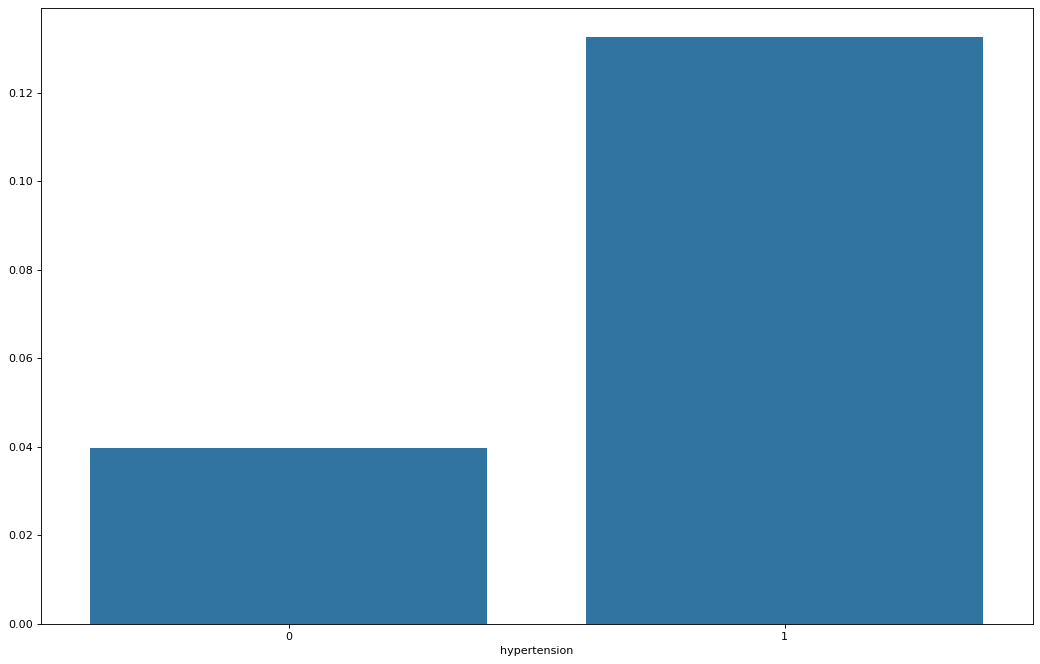

In [7]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=ax)

In [8]:
groups = data[['hypertension', 'heart_disease']]
grouped_data = groups.groupby('hypertension')['heart_disease'].mean()
grouped_data = grouped_data.sort_values()

<Axes: xlabel='hypertension'>

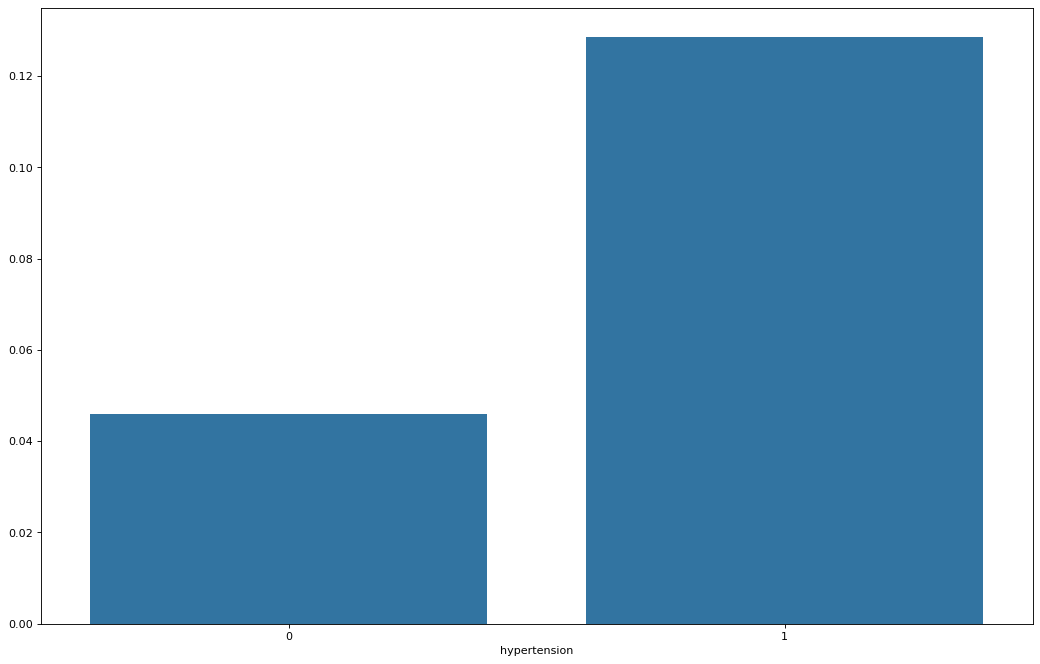

In [9]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=ax)

In [10]:
x = data.drop(columns=['stroke'])
y = data['stroke']

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
n_data['gender'] = [1 if x == 'Male' else 0 for x in n_data['gender']]
n_data['ever_married'] = [1 if x == 'Yes' else 0 for x in n_data['ever_married']]
n_data['work_type'] = [1 if x == 'Private' else 0 for x in n_data['work_type']]
n_data['Residence_type'] = [1 if x == 'Urban' else 0 for x in n_data['Residence_type']]


C:\Users\FOR CLONE\AppData\Local\Temp\ipykernel_4384\3347792339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_data['gender'] = [1 if x == 'Male' else 0 for x in n_data['gender']]
C:\Users\FOR CLONE\AppData\Local\Temp\ipykernel_4384\3347792339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_data['ever_married'] = [1 if x == 'Yes' else 0 for x in n_data['ever_married']]
C:\Users\FOR CLONE\AppData\Local\Temp\ipykernel_4384\3347792339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [13]:
n_data['smoking_status'] = n_data['smoking_status'].map({'smokes': 1, 'never smoked': 0, 'formerly smoked': 2, 'Unknown': 3})

C:\Users\FOR CLONE\AppData\Local\Temp\ipykernel_4384\482521229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_data['smoking_status'] = n_data['smoking_status'].map({'smokes': 1, 'never smoked': 0, 'formerly smoked': 2, 'Unknown': 3})


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
x_train['gender'] = [1 if x == 'Male' else 0 for x in x_train['gender']]
x_train['ever_married'] = [1 if x == 'Yes' else 0 for x in x_train['ever_married']]
x_train['work_type'] = [1 if x == 'Private' else 0 for x in x_train['work_type']]
x_train['Residence_type'] = [1 if x == 'Urban' else 0 for x in x_train['Residence_type']]
x_train['smoking_status'] = x_train['smoking_status'].map({'smokes': 1, 'never smoked': 0, 'formerly smoked': 2, 'Unknown': 3})

In [16]:
x_test['gender'] = [1 if x == 'Male' else 0 for x in x_test['gender']]
x_test['ever_married'] = [1 if x == 'Yes' else 0 for x in x_test['ever_married']]
x_test['work_type'] = [1 if x == 'Private' else 0 for x in x_test['work_type']]
x_test['Residence_type'] = [1 if x == 'Urban' else 0 for x in x_test['Residence_type']]
x_test['smoking_status'] = x_test['smoking_status'].map({'smokes': 1, 'never smoked': 0, 'formerly smoked': 2, 'Unknown': 3})

In [17]:
from sklearn.tree import DecisionTreeClassifier 
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

prediction = dcs.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')

Accuracy: 90.6885758998435
Precision: 24.675324675324674


In [19]:
n_prediction = dcs.predict(x_test.head(1))
x_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,40041,1,31.0,0,0,0,0,0,64.85,23.0,3
4478,55244,1,40.0,0,0,1,0,0,65.29,28.3,0
3849,70992,0,8.0,0,0,0,0,1,74.42,22.5,3
4355,38207,0,79.0,1,0,1,0,0,76.64,19.5,0
3826,8541,0,75.0,0,0,1,0,0,94.77,27.2,0
